In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sci
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl

from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model
from nems_lbhb.pupil_behavior_scripts.mod_per_state import aud_vs_state
from nems_lbhb.pupil_behavior_scripts.mod_per_state import hlf_analysis
from nems_lbhb.stateplots import model_per_time_wrapper, beta_comp

%matplotlib inline
os.getcwd()

#color_b = '#82418B' #dark purple 
#color_p = '#2E7E3E' #dark green
color_b = '#C768D8'
color_p = '#47BF55'
color_both = '#000000'
color_either = '#595959'
color_ns = '#BFBFBF'


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 60)

[nems0.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2019-02-04 185052.log
[nems_web INFO] No value specified for: DEBUG. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: CSRF_ENABLED. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: CSRF_SESSION_KEY. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: SECRET_KEY. Using default value in nems_web.configs.defaults
[nems_web INFO] No value specified for: PORT. Using default value in nems_web.configs.defaults


In [4]:
# load csv with pupil Data frame 
#average pre-trial and evoked pupil for each site during passive and active. 
#Also the correlation between pupil diameter and active/passive state (cc_pup_beh). 
d_pup = pd.read_csv('PTD_ev_pupil.per_site.csv') 
d_pup = d_pup.drop(['Unnamed: 0'], axis=1)

In [7]:
# add colums
d_pup['baseline_pa'] = d_pup['baseline_a']-d_pup['baseline_p']
d_pup['evoked_pa'] = d_pup['evoked_a']-d_pup['evoked_p']
d_pup

,baseline_p,baseline_a,evoked_p,evoked_a,cc_pup_beh,baseline_pa,evoked_pa
0,0.564262,0.570896,0.001847,0.001242,0.078119,0.006634,-0.000605
1,0.429763,0.497461,-0.000245,0.022241,0.282659,0.067698,0.022486
2,0.583931,0.574182,0.002205,0.025621,-0.088641,-0.009749,0.023416
3,0.391540,0.468597,0.000202,0.035001,0.307686,0.077057,0.034799
4,0.483543,0.484720,-0.007516,0.018320,0.065868,0.001177,0.025836
5,0.604885,0.631689,-0.001630,0.016910,0.226980,0.026804,0.018540
6,0.651323,0.624277,-0.002576,0.021776,-0.137050,-0.027046,0.024352
7,0.427739,0.532128,-0.006353,0.004465,0.339147,0.104389,0.010818
8,0.350794,0.470094,0.003516,0.028747,0.446895,0.119300,0.025232
9,0.415497,0.482464,0.000554,0.008449,0.362226,0.066967,0.007895


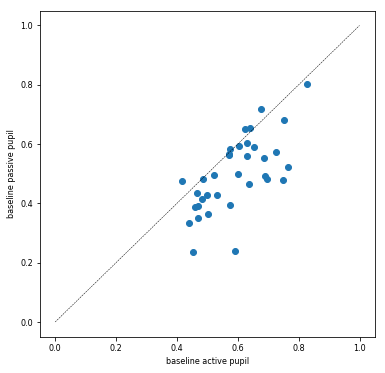

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(d_pup['baseline_a'], d_pup['baseline_p'], marker='o')
xlim = (0,1) 
ylim = (0,1)
slope = 1
c = xlim[0]
x_min = xlim[0]
x_max = xlim[1]
y_min, y_max = c, c + slope*(x_max-x_min)
plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
plt.xlabel('baseline active pupil')
plt.ylabel('baseline passive pupil')

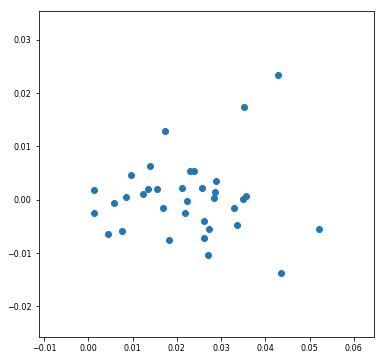

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(d_pup['evoked_a'], d_pup['evoked_p'], marker='o')
# xlim = (0,1) 
# ylim = (0,1)
# slope = 1
# c = xlim[0]
# x_min = xlim[0]
# x_max = xlim[1]
# y_min, y_max = c, c + slope*(x_max-x_min)
# plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
# plt.xlabel('evoked active pupil')
# plt.ylabel('evoked passive pupil')

(array([ 1.,  4.,  1.,  4.,  4.,  5.,  5.,  2.,  6.,  3.]),
 array([-0.28434682, -0.18332236, -0.0822979 ,  0.01872655,  0.11975101,
         0.22077547,  0.32179993,  0.42282439,  0.52384885,  0.6248733 ,
         0.72589776]),
 <a list of 10 Patch objects>)

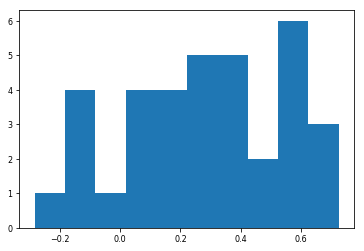

In [16]:
plt.hist(d_pup['cc_pup_beh'], bins=10)